<a href="https://colab.research.google.com/github/rishi-tha16/DLassignment1/blob/main/DLassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 26.4M/26.4M [00:01<00:00, 19.5MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 302kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.47MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 16.1MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



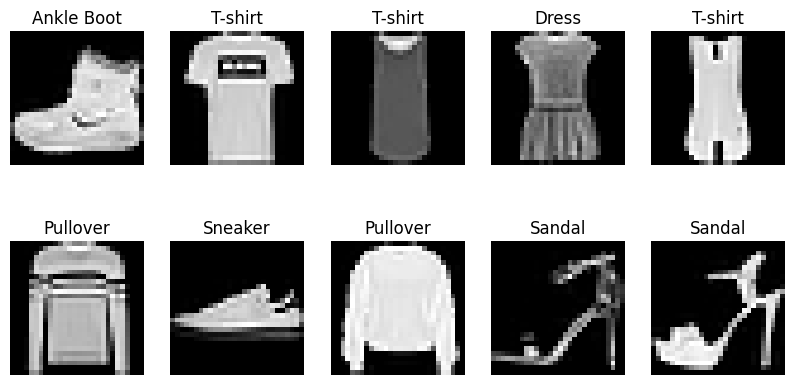

Training model: Layers=[32, 32, 32], Optimizer=sgd, LR=0.001, Activation=relu
Epoch 1, Loss: 2825.1419, Val Acc: 67.92%
Epoch 2, Loss: 1465.9348, Val Acc: 73.92%
Epoch 3, Loss: 1188.9306, Val Acc: 76.32%
Epoch 4, Loss: 1076.5417, Val Acc: 77.85%
Epoch 5, Loss: 1004.7613, Val Acc: 79.43%
Training model: Layers=[32, 32, 32], Optimizer=sgd, LR=0.001, Activation=sigmoid
Epoch 1, Loss: 3909.8651, Val Acc: 10.17%
Epoch 2, Loss: 3887.5226, Val Acc: 10.42%
Epoch 3, Loss: 3885.5291, Val Acc: 11.70%
Epoch 4, Loss: 3884.3201, Val Acc: 14.95%
Epoch 5, Loss: 3883.0997, Val Acc: 16.70%
Training model: Layers=[32, 32, 32], Optimizer=sgd, LR=0.0001, Activation=relu
Epoch 1, Loss: 3845.4329, Val Acc: 19.02%
Epoch 2, Loss: 3699.9608, Val Acc: 24.78%
Epoch 3, Loss: 3560.2553, Val Acc: 24.55%
Epoch 4, Loss: 3423.2863, Val Acc: 25.07%
Epoch 5, Loss: 3281.5448, Val Acc: 26.83%
Training model: Layers=[32, 32, 32], Optimizer=sgd, LR=0.0001, Activation=sigmoid
Epoch 1, Loss: 3924.4483, Val Acc: 10.17%
Epoch 2,

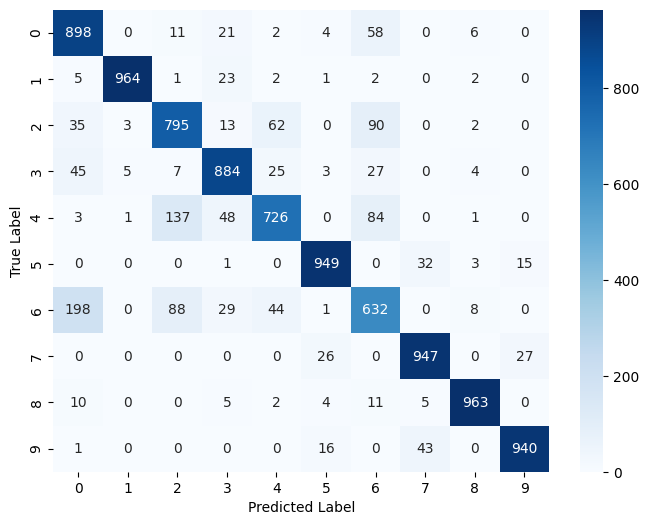

Recommendations for MNIST:
1. Use Adam optimizer with a learning rate of 1e-3 for stable convergence.
2. Use 3 hidden layers with 128 neurons each for balanced performance.
3. Use ReLU activation for faster convergence compared to Sigmoid.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from torch.utils.data import DataLoader, random_split

# Load FashionMNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Plot sample images
def plot_sample_images(dataset):
    labels_map = {0: "T-shirt", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for i, ax in enumerate(axes.flat):
        image, label = dataset[i]
        ax.imshow(image.squeeze(), cmap='gray')
        ax.set_title(labels_map[label])
        ax.axis('off')
    plt.show()

plot_sample_images(train_dataset)

# Split training set into training and validation
train_size = int(0.9 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# Define DataLoaders
batch_size = 32  # Configurable
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define Neural Network
class FeedforwardNN(nn.Module):
    def __init__(self, input_size=784, hidden_layers=[128, 64], output_size=10, activation='relu'):
        super(FeedforwardNN, self).__init__()
        layers = []
        prev_size = input_size

        for size in hidden_layers:
            layers.append(nn.Linear(prev_size, size))
            nn.init.xavier_uniform_(layers[-1].weight)
            layers.append(nn.ReLU() if activation == 'relu' else nn.Sigmoid())
            prev_size = size

        layers.append(nn.Linear(prev_size, output_size))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.model(x)

# Training function
def train_model(model, optimizer, criterion, epochs=10):
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        correct = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            correct += (outputs.argmax(dim=1) == labels).sum().item()

        val_acc = evaluate_model(model)
        print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}, Val Acc: {val_acc:.2f}%")
    return model

# Evaluation function
def evaluate_model(model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            correct += (outputs.argmax(dim=1) == labels).sum().item()
            total += labels.size(0)
    return (correct / total) * 100

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameter tuning
hidden_layers_options = [[32, 32, 32], [64, 64, 64], [128, 128, 128]]
optimizers_options = ['sgd', 'momentum', 'nesterov', 'rmsprop', 'adam', 'nadam']
learning_rates = [1e-3, 1e-4]
activation_functions = ['relu', 'sigmoid']

best_acc = 0
best_model = None

for hidden_layers in hidden_layers_options:
    for opt_name in optimizers_options:
        for lr in learning_rates:
            for act in activation_functions:
                model = FeedforwardNN(hidden_layers=hidden_layers, activation=act).to(device)
                criterion = nn.CrossEntropyLoss()
                if opt_name == 'sgd':
                    optimizer = optim.SGD(model.parameters(), lr=lr)
                elif opt_name == 'momentum':
                    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
                elif opt_name == 'nesterov':
                    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, nesterov=True)
                elif opt_name == 'adam':
                    optimizer = optim.Adam(model.parameters(), lr=lr)
                elif opt_name == 'rmsprop':
                    optimizer = optim.RMSprop(model.parameters(), lr=lr)
                elif opt_name == 'nadam':
                    optimizer = optim.NAdam(model.parameters(), lr=lr)

                print(f"Training model: Layers={hidden_layers}, Optimizer={opt_name}, LR={lr}, Activation={act}")
                trained_model = train_model(model, optimizer, criterion, epochs=5)
                acc = evaluate_model(trained_model)
                if acc > best_acc:
                    best_acc = acc
                    best_model = trained_model

# Final Evaluation
def test_model(model):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    print(f"Test Accuracy: {(correct / total) * 100:.2f}%")
    plot_confusion_matrix(all_labels, all_preds)

# Confusion matrix
def plot_confusion_matrix(labels, preds):
    cm = confusion_matrix(labels, preds)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

test_model(best_model)

